In [31]:
import pandas as pd
# TODO: normalize so we have % of households making certain income and % of violations per ?? idk

income_df = pd.read_csv("../data/income/income_census_data.csv")
zip_df = pd.read_csv("../data/zip_df_with_num_buildings.csv", index_col=0)
zip_df.shape


(31, 12)

In [32]:
# Cleaning up the Census Income Data
#    NOTE: The census data only includes the zipcodes in Boston

# Make first row the header (since this contains actual names of the columns)
income_df.columns = income_df.iloc[0]
income_df = income_df.drop(0)
# Remove all NaN columns from end (percentage data not available)
income_df = income_df.drop(columns=income_df.columns[54:])
# Remove all Annotation columns since they are all NaN
income_df = income_df.filter(regex='^((?!Annotation of).)*$')
# Remove prefix ZCTA5 from zipcode
income_df['Geographic Area Name'] = income_df['Geographic Area Name'].apply(lambda x: x[6:])
income_df = income_df.rename(columns={'Geographic Area Name': 'Location'})

#Modify column names?

#Convert columns to numeric values (they are strings not numbers)
#income_df['Location'] = income_df['Location'].apply(lambda x: int(x))
income_df["Estimate!!Households!!Total"] = income_df["Estimate!!Households!!Total"].apply(lambda x: float(x))
income_df['Estimate!!Households!!Total!!Less than $10,000'] = income_df['Estimate!!Households!!Total!!Less than $10,000'].apply(lambda x: float(x))
income_df['Estimate!!Households!!Total!!$10,000 to $14,999'] = income_df['Estimate!!Households!!Total!!$10,000 to $14,999'].apply(lambda x: float(x))
income_df['Estimate!!Households!!Total!!$15,000 to $24,999'] = income_df['Estimate!!Households!!Total!!$15,000 to $24,999'].apply(lambda x: float(x))
income_df['Estimate!!Households!!Total!!$25,000 to $34,999'] = income_df['Estimate!!Households!!Total!!$25,000 to $34,999'].apply(lambda x: float(x))
income_df['Estimate!!Households!!Total!!$35,000 to $49,999'] = income_df['Estimate!!Households!!Total!!$35,000 to $49,999'].apply(lambda x: float(x))
income_df['Estimate!!Households!!Total!!$50,000 to $74,999'] = income_df['Estimate!!Households!!Total!!$50,000 to $74,999'].apply(lambda x: float(x))


#Make a new columns
income_df["Estimate of Total Households $24,999 or Less"] = income_df['Estimate!!Households!!Total!!Less than $10,000'] + income_df['Estimate!!Households!!Total!!$10,000 to $14,999'] + income_df['Estimate!!Households!!Total!!$15,000 to $24,999']
income_df["Estimate of Total Households $24,999 or Less Normalized"] = income_df["Estimate of Total Households $24,999 or Less"] / income_df["Estimate!!Households!!Total"]

income_df["Estimate of Total Households $25,000 to $49,999"] = income_df['Estimate!!Households!!Total!!$25,000 to $34,999'] + income_df['Estimate!!Households!!Total!!$35,000 to $49,999'] 
income_df["Estimate of Total Households $25,000 to $49,999 Normalized"] = income_df["Estimate of Total Households $25,000 to $49,999"] / income_df["Estimate!!Households!!Total"]

income_df["Estimate of Total Households $50,000 to $74,999 Normalized"] = income_df["Estimate!!Households!!Total!!$50,000 to $74,999"] / income_df["Estimate!!Households!!Total"]

# income_df.head()



In [33]:
zip_df['Location'] = zip_df['Location'].apply(lambda x: '0' + str(x))
#zip_df.head(33)
income_df.head()


,Geography,Location,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Margin of Error!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to $24,999",...,"Margin of Error!!Households!!Total!!$200,000 or more",Estimate!!Households!!Median income (dollars),Margin of Error!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Margin of Error!!Households!!Mean income (dollars),"Estimate of Total Households $24,999 or Less","Estimate of Total Households $24,999 or Less Normalized","Estimate of Total Households $25,000 to $49,999","Estimate of Total Households $25,000 to $49,999 Normalized","Estimate of Total Households $50,000 to $74,999 Normalized"
1,8600000US02108,02108,2046.0,266,3.7,2.7,1.5,1.3,0.0,1.9,...,8.7,152442,38135,256003,48603,5.2,0.002542,7.9,0.003861,0.004790
2,8600000US02109,02109,1892.0,211,2.7,2.3,1.4,1.1,2.2,1.7,...,6.8,156119,11006,223066,30023,6.3,0.003330,5.5,0.002907,0.008140
3,8600000US02110,02110,1325.0,229,8.8,6.1,3.1,2.9,1.1,1.9,...,9.6,111971,28722,283939,74620,13.0,0.009811,9.3,0.007019,0.008226
4,8600000US02111,02111,3626.0,378,15.3,4.5,9.5,4.1,10.7,4.2,...,6.3,52663,20062,138477,33561,35.5,0.009790,14.0,0.003861,0.002261
5,8600000US02113,02113,4286.0,397,2.7,1.6,2.5,1.6,3.4,1.6,...,4.0,97686,7795,137447,19823,8.6,0.002007,9.1,0.002123,0.004643


In [34]:
# Merge the data frames
# TODO: Fix by using normal ciolations by zip (not top 20) and merge so only ones in boston are included


income_violations_zip = income_df.merge(zip_df, on = 'Location') # we only want to keep data that is in the income data? or both
income_violations_zip.shape
# TODO: Figure out which Boston zipcodes are missing (and from which csv)

(28, 44)

In [35]:
print(income_violations_zip.columns.get_loc("Estimate of Total Households $24,999 or Less Normalized"))
print(income_violations_zip.columns.get_loc("Total Normalized"))

29
43


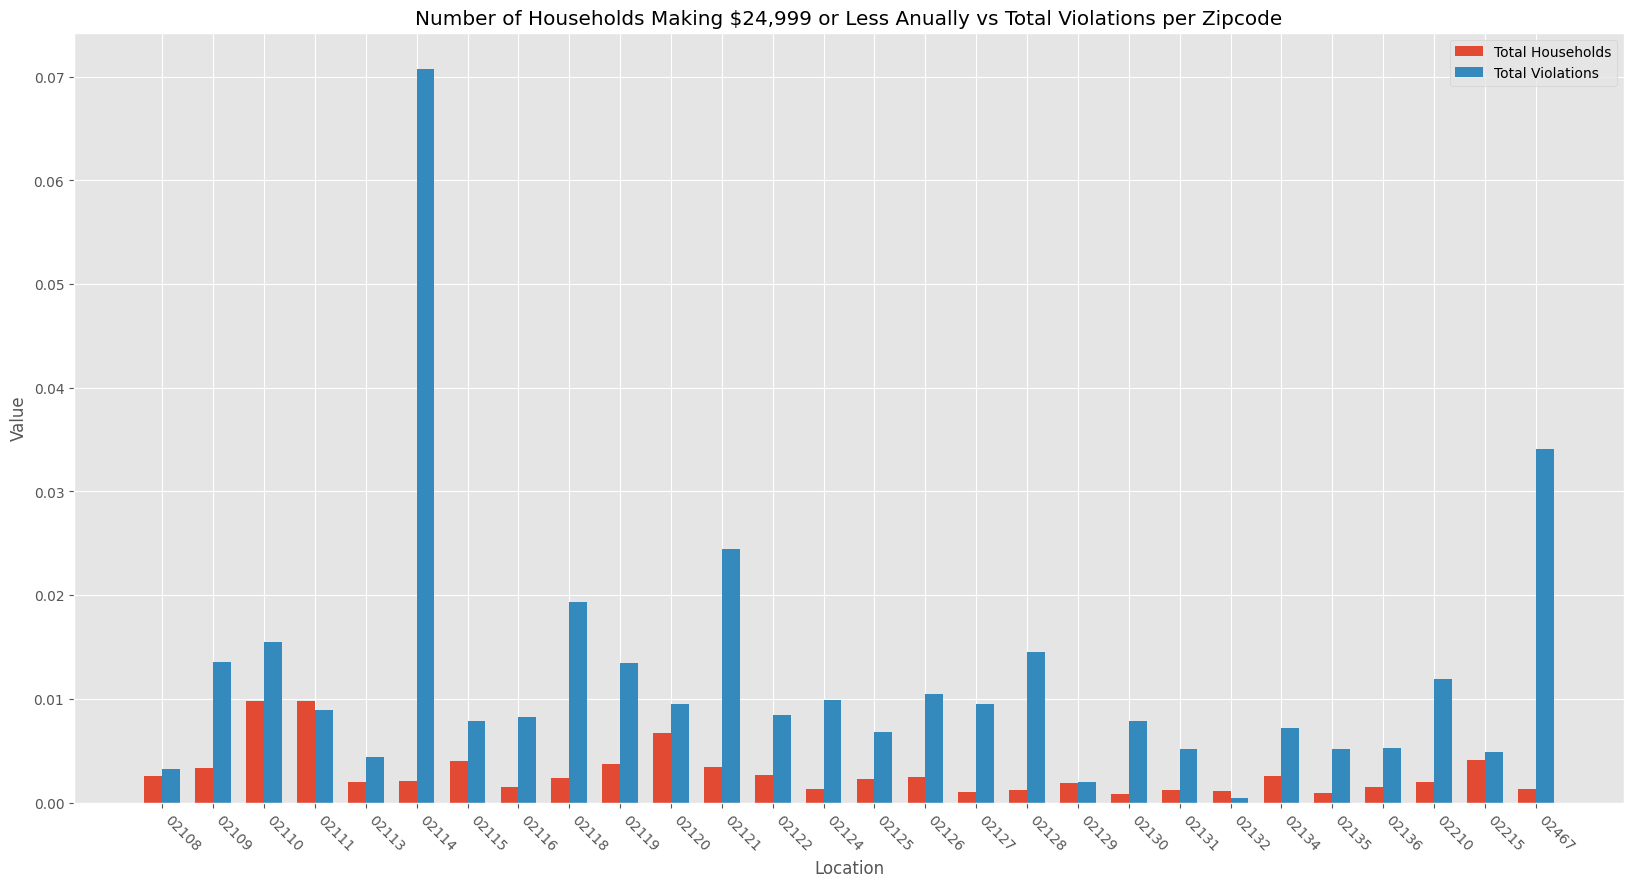

In [36]:
# Try Plotting something
# Maybe do percetage of households at x dollars vs normalized total?
# Or total vs. number households ina specific income bracket
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# visualization
# Set the style for the plot
plt.style.use('ggplot')

bar_width = 0.35

# Create the x values
locations = np.arange(len(income_violations_zip['Location']))

# # Create a bar chart
fig, ax = plt.subplots(figsize=(20, 10))

bar1 = ax.bar(locations - bar_width/2,income_violations_zip['Estimate of Total Households $24,999 or Less Normalized'], bar_width, label='Total Households' )
bar2 = ax.bar(locations + bar_width/2, income_violations_zip['Total Normalized'], bar_width, label='Total Violations')

#/int(income_violations_zip['Estimate!!Households!!Total'])

# Set labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Value')
ax.set_title('Number of Households Making $24,999 or Less Anually vs Total Violations per Zipcode')
ax.set_xticks(locations)
ax.set_xticklabels(income_violations_zip['Location'])
plt.xticks(rotation=-45, ha = 'left')
ax.legend()

# Display the plot
plt.show()

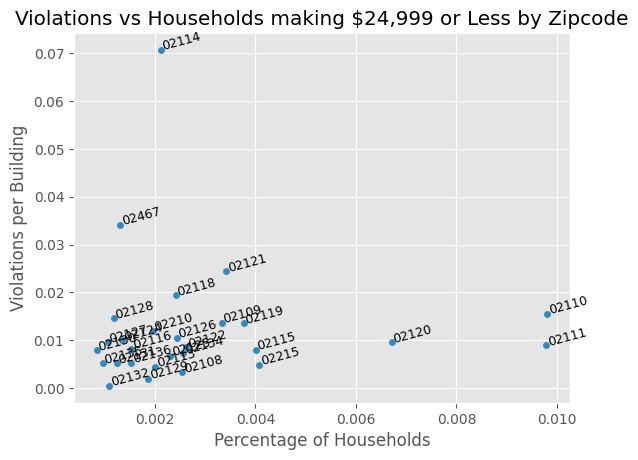

In [44]:
import matplotlib.pyplot as plt

income_violations_zip.plot.scatter(x='Estimate of Total Households $24,999 or Less Normalized', y='Total Normalized', colormap='viridis')
plt.title("Violations vs Households making $24,999 or Less by Zipcode")
plt.xlabel("Percentage of Households")
plt.ylabel("Violations per Building")

#Total violations and number of households
for i, txt in enumerate(income_violations_zip['Location']):
    plt.annotate(txt, (income_violations_zip.iat[i, 29], income_violations_zip.iat[i, 43]), fontsize = 9, ha = 'left',rotation = 15)


plt.show()

Text(0, 0.5, 'Violations per Building')

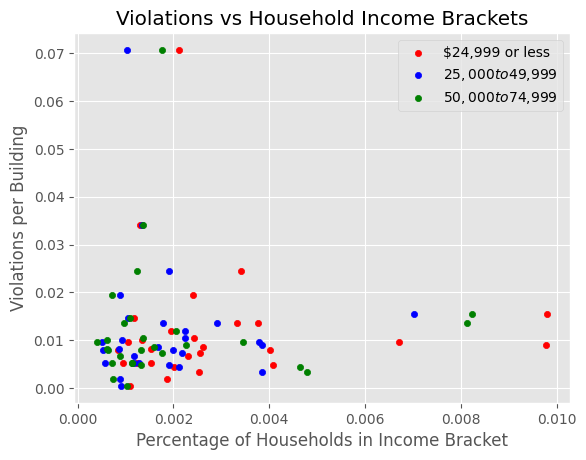

In [54]:
ax = income_violations_zip.plot.scatter(x='Estimate of Total Households $24,999 or Less Normalized', y='Total Normalized',color='red', label ='$24,999 or less')
income_violations_zip.plot.scatter(x='Estimate of Total Households $25,000 to $49,999 Normalized', y='Total Normalized', color = 'blue', label ='$25,000 to $49,999', ax=ax)
income_violations_zip.plot.scatter(x='Estimate of Total Households $50,000 to $74,999 Normalized', y='Total Normalized', color ='green', label ='$50,000 to $74,999', ax=ax)
plt.title("Violations vs Household Income Brackets")
plt.xlabel("Percentage of Households in Income Bracket")
plt.ylabel("Violations per Building")

Here we are working with the census table: PUBLIC ASSISTANCE INCOME OR FOOD STAMPS/SNAP IN THE PAST 12 MONTHS FOR HOUSEHOLDS for all zipcodes in Boston.

In [39]:
snap_df = pd.read_csv("../data/income/assistance_census_data.csv")
snap_df.head()

,GEO_ID,NAME,B19058_001E,B19058_001EA,B19058_001M,B19058_001MA,B19058_002E,B19058_002EA,B19058_002M,B19058_002MA,B19058_003E,B19058_003M,B19058_003MA,B19058_003EA,Unnamed: 14
0,Geography,Geographic Area Name,Estimate!!Total:,Annotation of Estimate!!Total:,Margin of Error!!Total:,Annotation of Margin of Error!!Total:,Estimate!!Total:!!With cash public assistance ...,Annotation of Estimate!!Total:!!With cash publ...,Margin of Error!!Total:!!With cash public assi...,Annotation of Margin of Error!!Total:!!With ca...,Estimate!!Total:!!No cash public assistance or...,Margin of Error!!Total:!!No cash public assist...,Annotation of Margin of Error!!Total:!!No cash...,Annotation of Estimate!!Total:!!No cash public...,NaN
1,8600000US02108,ZCTA5 02108,2046,NaN,266,NaN,18,NaN,28,NaN,2028,264,NaN,NaN,NaN
2,8600000US02109,ZCTA5 02109,1892,NaN,211,NaN,61,NaN,45,NaN,1831,209,NaN,NaN,NaN
3,8600000US02110,ZCTA5 02110,1325,NaN,229,NaN,65,NaN,47,NaN,1260,218,NaN,NaN,NaN
4,8600000US02111,ZCTA5 02111,3626,NaN,378,NaN,888,NaN,195,NaN,2738,329,NaN,NaN,NaN


In [40]:
# Cleaning up the Census Assistance Data
#    NOTE: The census data only includes the zipcodes in Boston

# Make first row the header (since this contains actual names of the columns)
snap_df.columns = snap_df.iloc[0]
snap_df = snap_df.drop(0)
# Remove all Annotation columns since they are all NaN
snap_df = snap_df.filter(regex='^((?!Annotation of).)*$')

# Remove prefix ZCTA5 from zipcode
snap_df['Geographic Area Name'] = snap_df['Geographic Area Name'].apply(lambda x: x[6:])
snap_df = snap_df.rename(columns={'Geographic Area Name': 'Location'})

#Modify column names?

#Convert columns to numeric values (they are strings not numbers)
snap_df['Estimate!!Total:'] = snap_df['Estimate!!Total:'].apply(lambda x: float(x))
snap_df['Estimate!!Total:!!With cash public assistance or Food Stamps/SNAP'] = snap_df['Estimate!!Total:!!With cash public assistance or Food Stamps/SNAP'].apply(lambda x: float(x))
snap_df['Estimate!!Total:!!No cash public assistance or Food Stamps/SNAP'] = snap_df['Estimate!!Total:!!No cash public assistance or Food Stamps/SNAP'].apply(lambda x: float(x))

#Drop last column bc its just empty
snap_df = snap_df.dropna(axis = 1)
#Make a new normalized column 
snap_df['Estimate!!Total:!!With cash public assistance or Food Stamps/SNAP Normalized'] = snap_df['Estimate!!Total:!!With cash public assistance or Food Stamps/SNAP'] / snap_df['Estimate!!Total:']

print(snap_df.shape)
snap_df.head()




(32, 9)


,Geography,Location,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!With cash public assistance or Food Stamps/SNAP,Margin of Error!!Total:!!With cash public assistance or Food Stamps/SNAP,Estimate!!Total:!!No cash public assistance or Food Stamps/SNAP,Margin of Error!!Total:!!No cash public assistance or Food Stamps/SNAP,Estimate!!Total:!!With cash public assistance or Food Stamps/SNAP Normalized
1,8600000US02108,02108,2046.0,266,18.0,28,2028.0,264,0.008798
2,8600000US02109,02109,1892.0,211,61.0,45,1831.0,209,0.032241
3,8600000US02110,02110,1325.0,229,65.0,47,1260.0,218,0.049057
4,8600000US02111,02111,3626.0,378,888.0,195,2738.0,329,0.244898
5,8600000US02113,02113,4286.0,397,128.0,72,4158.0,410,0.029865


In [41]:
# Merge the data frames

snap_df.shape

snap_violations_zip = snap_df.merge(zip_df, on = 'Location') # we only want to keep data that is in the income data? or both
snap_violations_zip.head()

,Geography,Location,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!With cash public assistance or Food Stamps/SNAP,Margin of Error!!Total:!!With cash public assistance or Food Stamps/SNAP,Estimate!!Total:!!No cash public assistance or Food Stamps/SNAP,Margin of Error!!Total:!!No cash public assistance or Food Stamps/SNAP,Estimate!!Total:!!With cash public assistance or Food Stamps/SNAP Normalized,Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total,num_buildings,Total Normalized
0,8600000US02108,02108,2046.0,266,18.0,28,2028.0,264,0.008798,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,618,0.003236
1,8600000US02109,02109,1892.0,211,61.0,45,1831.0,209,0.032241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,369,0.013550
2,8600000US02110,02110,1325.0,229,65.0,47,1260.0,218,0.049057,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,194,0.015464
3,8600000US02111,02111,3626.0,378,888.0,195,2738.0,329,0.244898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,450,0.008889
4,8600000US02113,02113,4286.0,397,128.0,72,4158.0,410,0.029865,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,911,0.004391


In [42]:
print(snap_violations_zip.columns.get_loc("Estimate!!Total:!!With cash public assistance or Food Stamps/SNAP Normalized"))
print(snap_violations_zip.columns.get_loc("Total Normalized"))


8
19


/Users/isa/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


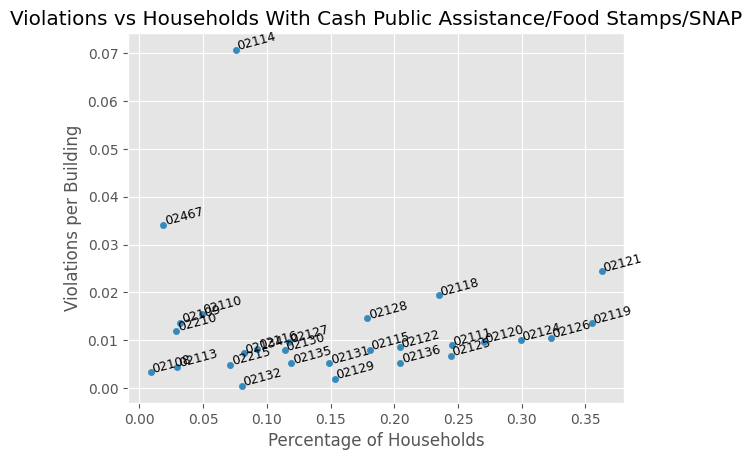

In [43]:
import matplotlib.pyplot as plt

snap_violations_zip.plot.scatter(x='Estimate!!Total:!!With cash public assistance or Food Stamps/SNAP Normalized', y='Total Normalized', colormap='viridis')
plt.title("Violations vs Households With Cash Public Assistance/Food Stamps/SNAP")
plt.xlabel("Percentage of Households")
plt.ylabel("Violations per Building")

#Total violations and number of households
for i, txt in enumerate(snap_violations_zip['Location']):
    plt.annotate(txt, (snap_violations_zip.iat[i, 8], snap_violations_zip.iat[i, 19]), fontsize = 9, ha = 'left',rotation = 15)


plt.show()